### An analysis on public perception of police in London

This is an analysis on public perception of police in London between 2014 and 2023

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

(Data sourced from [London datastore](https://data.london.gov.uk/dataset/public-perception-) with [UK Open Government Licence v3](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/))

### Read in the data

In [2]:
df = pd.read_csv("https://data.london.gov.uk/download/public-perception-/d2cbb777-d155-4d0d-965b-49b865fc29df/public-perception-data.csv")

In [3]:
# change to datetime format
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

In [4]:
# sort by date
df = df.sort_values('date', ascending=True)

### Create a pivot table

In [5]:
df_wide = df.pivot(index='date', columns='measure', values='proportion')

In [6]:
df_wide.head()

measure,Agree the police are dealing with the things that matter to this community,Agree the police can be relied upon to be there when needed,Agree the police listen to the concerns of local people,Agree the police treat everyone fairly regardless of who they are,Feels well informed about local police activities over the last 12 months,Knows how to contact their local ward officer,Police do a good job in the local area
date,,,,,,,
2014-12-01,72.0,77.0,74.0,74.0,49.0,41.0,67.0
2015-03-01,73.0,77.0,74.0,75.0,47.0,42.0,67.0
2015-06-01,73.0,77.0,74.0,74.0,47.0,41.0,66.0
2015-09-01,72.0,77.0,73.0,74.0,45.0,39.0,67.0
2015-12-01,71.0,77.0,73.0,75.0,43.0,38.0,67.0


### Visualise the data

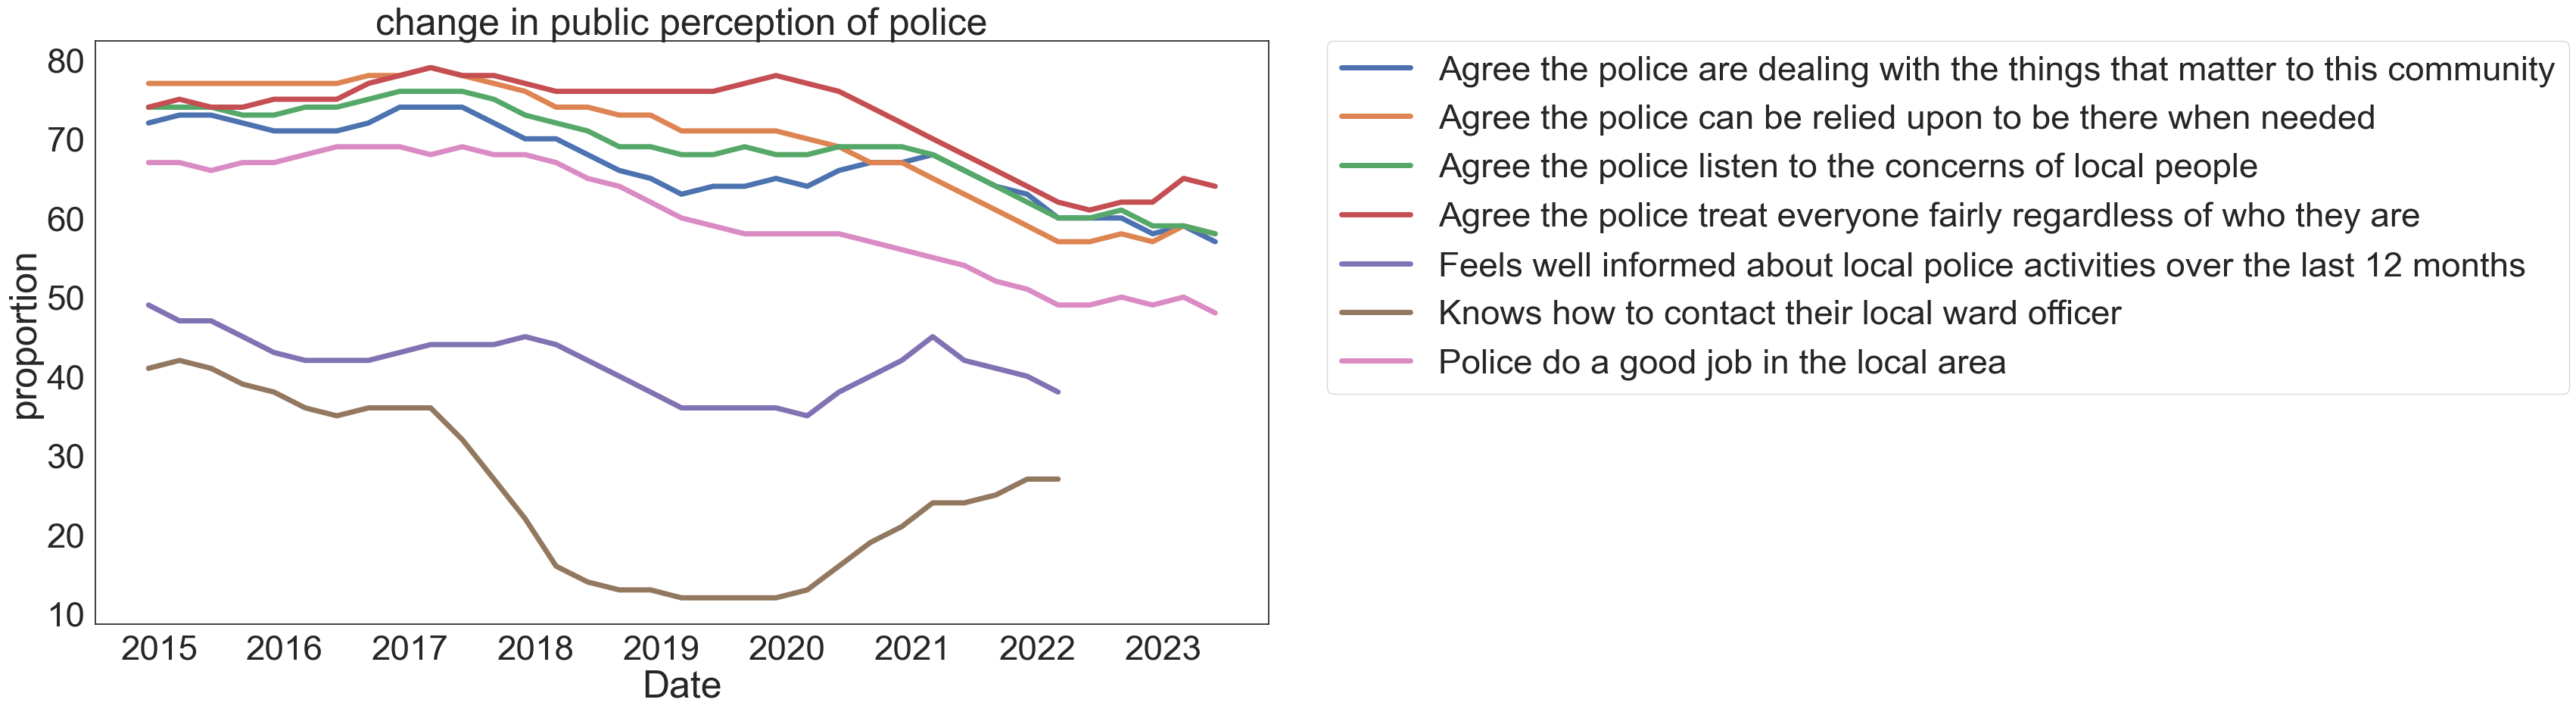

In [10]:
#plot a lineplot to show changes over the years
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x='date', y='proportion', data=df, hue='measure', linewidth = 5).set(title='change in public perception of police', xlabel='Date', ylabel='proportion')
sns.set_theme(style='white', font_scale=3)

# get the legend object
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(5.0)

### Correlation matrix between measures

<Axes: xlabel='measure', ylabel='measure'>

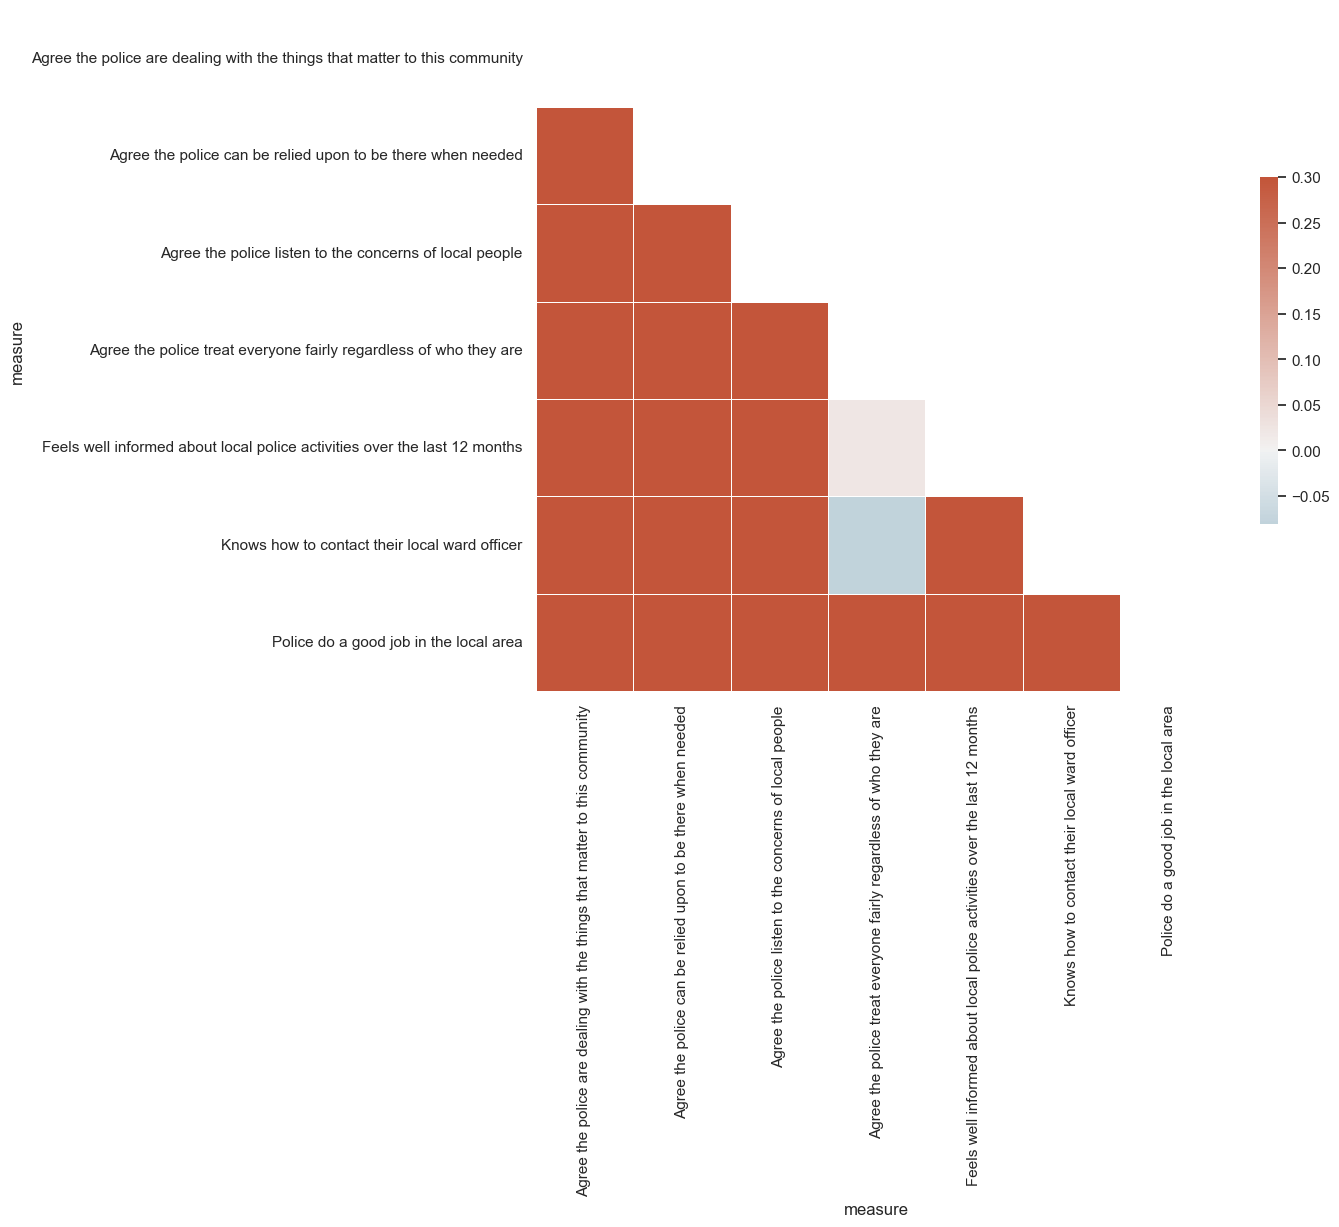

In [8]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_wide.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})